In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
%%time

data_address = '../Data/'
file_gal = open(data_address + 'galaxies.txt', 'r')
header = file_gal.readline()
print(header)
df_gal = pd.read_csv(file_gal,  sep='\s+', names=header.replace('#', ' ').split(), 
                     usecols = ['x[kpc/h]', 'y[kpc/h]', 'z[kpc/h]', 'm[Msol/h]', 
                                'host', 'vx[km/s]', 'vy[km/s]', 'vz[km/s]'])
df_gal.describe()

# UID x[kpc/h] y[kpc/h] z[kpc/h] x_pix y_pix i_sector m[Msol/h] sfr[Msol/year] host dist[kpc/h] log10(m_cD/m) m_gas[Msol/h] vx[km/s] vy[km/s] vz[km/s] dv[km/s] vr[km/s] vt[km/s]

CPU times: user 26.5 s, sys: 831 ms, total: 27.3 s
Wall time: 27.3 s


,x[kpc/h],y[kpc/h],z[kpc/h],m[Msol/h],host,vx[km/s],vy[km/s],vz[km/s]
count,9.184007e+06,9.184007e+06,9.184007e+06,9.184007e+06,9.184007e+06,9.184007e+06,9.184007e+06,9.184007e+06
mean,3.227965e+05,3.212658e+05,3.203963e+05,1.835536e+10,5.307991e+04,-2.168058e-01,1.159896e-01,8.554355e-02
std,1.850009e+05,1.836559e+05,1.837623e+05,5.968222e+10,1.330699e+04,3.521816e+02,3.457874e+02,3.293684e+02
min,2.472523e-02,4.897413e-03,8.584157e-02,1.408010e+08,0.000000e+00,-4.338618e+03,-3.448558e+03,-3.531906e+03
25%,1.611469e+05,1.632932e+05,1.615272e+05,2.066080e+09,5.723700e+04,-2.234692e+02,-2.181064e+02,-2.052922e+02
50%,3.268581e+05,3.249696e+05,3.203467e+05,6.057140e+09,5.723700e+04,-5.354158e+00,2.217281e+00,-6.671054e-01
75%,4.820850e+05,4.770828e+05,4.787981e+05,2.006780e+10,5.723700e+04,2.187658e+02,2.185912e+02,2.044876e+02
max,6.399999e+05,6.399998e+05,6.399999e+05,1.077460e+13,5.723700e+04,3.405616e+03,3.897406e+03,3.396540e+03


In [8]:
file_clus = open(data_address + 'massive_clusters.csv', 'r')
header_clus = file_clus.readline()
print(header_clus)

df_clusters_orig = pd.read_csv(data_address + 'massive_clusters.csv')  #massive_clusters.csv contains clusters with M_500c greater than 10^13.5 h^{-1} M_sun as done by Tanimura et al. (2020)

df_clusters_orig.describe()

UID,x[kpc/h],y[kpc/h],z[kpc/h],x_pix,y_pix,i_sector,m500c[Msol/h],r500c[kpc/h],gas_frac,star_frac,T[kev],Lx[1e44erg/s],Y500c,M_sat/M_cD,cshift[kpc],vx[km/s],vy[km/s],vz[km/s]



,UID,x[kpc/h],y[kpc/h],z[kpc/h],x_pix,y_pix,i_sector,m500c[Msol/h],r500c[kpc/h],gas_frac,star_frac,T[kev],Lx[1e44erg/s],Y500c,M_sat/M_cD,cshift[kpc],vx[km/s],vy[km/s],vz[km/s]
count,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6.080000e+03,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.0,6080.000000,6080.000000,6080.000000
mean,3488.193257,326416.401838,322055.402286,321308.240244,8355.764309,8138.877467,23.957072,6.356245e+13,572.368263,0.082999,0.034794,1.758613,0.705022,8.374527,0.221839,0.0,2.109102,-1.647297,-4.296055
std,2329.428037,186021.550694,182650.899538,183665.854310,4762.153189,4675.865730,14.054741,4.851698e+13,104.408418,0.013720,0.004241,0.662914,5.568893,7.818182,0.183561,0.0,316.064539,306.226537,286.454388
min,0.000000,19.163288,152.653880,87.370949,0.000000,1.000000,0.000000,3.162340e+13,469.915000,0.047243,0.021316,0.829052,0.039707,2.482601,0.013577,0.0,-1179.530000,-1163.520000,-1104.790000
25%,1534.750000,160978.575000,164793.430000,161863.925000,4120.250000,4260.500000,12.000000,3.795035e+13,499.370250,0.073166,0.031833,1.338318,0.131050,4.404214,0.095263,0.0,-200.229000,-205.139250,-190.806000
50%,3195.500000,338884.565000,333274.345000,322110.075000,8675.000000,7852.000000,24.000000,4.801630e+13,540.105000,0.082729,0.034713,1.553440,0.208041,5.919045,0.165076,0.0,-3.619450,1.969450,-8.055475
75%,5159.250000,486227.747500,473556.765000,478893.610000,12447.250000,12165.250000,36.000000,6.945502e+13,610.834750,0.092143,0.037602,1.954277,0.409907,9.258985,0.291966,0.0,206.816750,207.755750,181.532000
max,11472.000000,639887.560000,639933.380000,639848.380000,16381.000000,16380.000000,48.000000,7.438200e+14,1346.370000,0.133647,0.049892,8.296910,259.085000,125.124350,2.079730,0.0,1197.640000,1164.960000,1201.260000


In [29]:
df_clusters_subset = pd.read_csv(data_address + 'massive_clusters.csv', 
                          usecols = ['UID', 'x[kpc/h]', 'y[kpc/h]', 'z[kpc/h]', 
                                     'm500c[Msol/h]', 'vx[km/s]', 'vy[km/s]', 'vz[km/s]'    ])  #massive_clusters.csv contains clusters with M_500c greater than 10^13.5 h^{-1} M_sun as done by Tanimura et al. (2020)

df_clusters_subset.describe()

,UID,x[kpc/h],y[kpc/h],z[kpc/h],m500c[Msol/h],vx[km/s],vy[km/s],vz[km/s]
count,6080.000000,6080.000000,6080.000000,6080.000000,6.080000e+03,6080.000000,6080.000000,6080.000000
mean,3488.193257,326416.401838,322055.402286,321308.240244,6.356245e+13,2.109102,-1.647297,-4.296055
std,2329.428037,186021.550694,182650.899538,183665.854310,4.851698e+13,316.064539,306.226537,286.454388
min,0.000000,19.163288,152.653880,87.370949,3.162340e+13,-1179.530000,-1163.520000,-1104.790000
25%,1534.750000,160978.575000,164793.430000,161863.925000,3.795035e+13,-200.229000,-205.139250,-190.806000
50%,3195.500000,338884.565000,333274.345000,322110.075000,4.801630e+13,-3.619450,1.969450,-8.055475
75%,5159.250000,486227.747500,473556.765000,478893.610000,6.945502e+13,206.816750,207.755750,181.532000
max,11472.000000,639887.560000,639933.380000,639848.380000,7.438200e+14,1197.640000,1164.960000,1201.260000


In [3]:
%%time

# df_gal = df_gal[df_gal['m[Msol/h]'] > 1 * 10**10 ]

df_gal.describe()



CPU times: user 1.97 s, sys: 215 ms, total: 2.19 s
Wall time: 2.19 s


,x[kpc/h],y[kpc/h],z[kpc/h],m[Msol/h],host,vx[km/s],vy[km/s],vz[km/s]
count,9.184007e+06,9.184007e+06,9.184007e+06,9.184007e+06,9.184007e+06,9.184007e+06,9.184007e+06,9.184007e+06
mean,3.227965e+05,3.212658e+05,3.203963e+05,1.835536e+10,5.307991e+04,-2.168058e-01,1.159896e-01,8.554355e-02
std,1.850009e+05,1.836559e+05,1.837623e+05,5.968222e+10,1.330699e+04,3.521816e+02,3.457874e+02,3.293684e+02
min,2.472523e-02,4.897413e-03,8.584157e-02,1.408010e+08,0.000000e+00,-4.338618e+03,-3.448558e+03,-3.531906e+03
25%,1.611469e+05,1.632932e+05,1.615272e+05,2.066080e+09,5.723700e+04,-2.234692e+02,-2.181064e+02,-2.052922e+02
50%,3.268581e+05,3.249696e+05,3.203467e+05,6.057140e+09,5.723700e+04,-5.354158e+00,2.217281e+00,-6.671054e-01
75%,4.820850e+05,4.770828e+05,4.787981e+05,2.006780e+10,5.723700e+04,2.187658e+02,2.185912e+02,2.044876e+02
max,6.399999e+05,6.399998e+05,6.399999e+05,1.077460e+13,5.723700e+04,3.405616e+03,3.897406e+03,3.396540e+03


In [44]:
# mask = df_gal['host'].isin(df_clusters_subset['UID'])
mask = df_gal['host'].isin([1])
df_gal_around_1_clus = df_gal[mask]

df_gal_around_1_clus.describe()



,x[kpc/h],y[kpc/h],z[kpc/h],m[Msol/h],host,vx[km/s],vy[km/s],vz[km/s]
count,460.000000,460.000000,460.000000,4.600000e+02,460.0,460.000000,460.000000,460.000000
mean,456850.815174,220383.389674,279169.488109,5.139317e+10,1.0,-169.342901,377.143864,-222.691540
std,607.847542,988.751240,704.140631,4.920883e+11,0.0,1023.455714,1273.674362,922.039879
min,455151.250000,218478.080000,277187.090000,1.454570e+08,1.0,-3037.876000,-2701.455300,-2842.678200
25%,456355.132500,219480.165000,278745.700000,2.227590e+09,1.0,-884.702607,-529.726688,-894.994230
50%,456853.670000,220429.170000,279185.500000,6.501395e+09,1.0,-250.858525,310.509415,-201.281775
75%,457231.790000,221104.675000,279610.080000,2.417640e+10,1.0,605.351880,1461.929950,402.125070
max,458849.620000,222782.530000,281160.530000,1.035580e+13,1.0,2374.129600,3076.893300,2350.083000


In [31]:
mask = df_gal['host'].isin(df_clusters_subset['UID'])
# mask = df_gal['host'].isin([1])
df_gal_around_6k_clus = df_gal[mask]

df_gal_around_6k_clus.describe()



,x[kpc/h],y[kpc/h],z[kpc/h],m[Msol/h],host,vx[km/s],vy[km/s],vz[km/s]
count,336184.000000,336184.000000,336184.000000,3.361840e+05,336184.000000,336184.000000,336184.000000,336184.000000
mean,329172.854786,323241.560822,322906.426669,4.923651e+10,2486.896536,1.038958,1.725178,-1.873782
std,187281.042578,181124.769894,183633.949853,2.338373e+11,2201.868529,639.969873,637.498271,626.754992
min,0.946504,0.307792,0.260974,1.408510e+08,0.000000,-4338.617700,-3448.557900,-3531.906000
25%,160940.610000,168424.262500,164808.947500,2.247975e+09,633.000000,-406.899723,-404.425790,-401.220468
50%,345522.295000,337118.125000,322110.185000,8.229665e+09,1873.000000,0.166462,0.448893,-3.547375
75%,491903.530000,471042.432500,479061.682500,2.512610e+10,3878.000000,409.798975,407.306480,396.476010
max,639995.750000,639996.310000,639997.560000,1.077460e+13,11472.000000,3405.616200,3897.405800,3396.539600


In [38]:
max(df_gal_around_6k_clus['host'])

11472

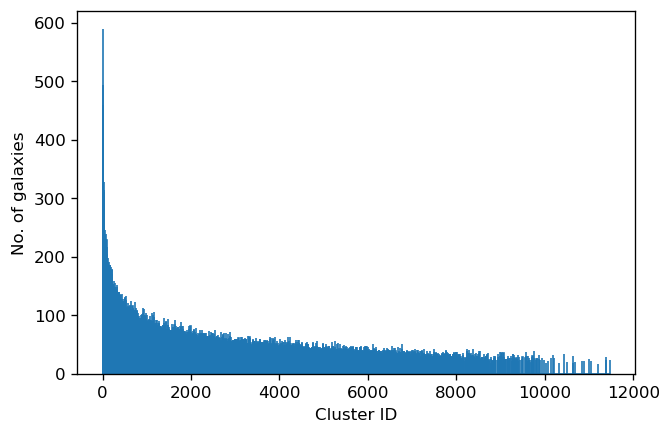

In [43]:
dpi = 120
plt.figure(dpi = dpi)
plt.hist(df_gal_around_6k_clus['host'], bins = max(df_gal_around_6k_clus['host']), 
         ec = 'C0')
# plt.yscale('log')
plt.xlabel('Cluster ID')
plt.ylabel('No. of galaxies');

In [63]:
print(df_gal_around_6k_clus.groupby('host').size().sum())
print(len(df_gal_around_6k_clus))

336184
336184


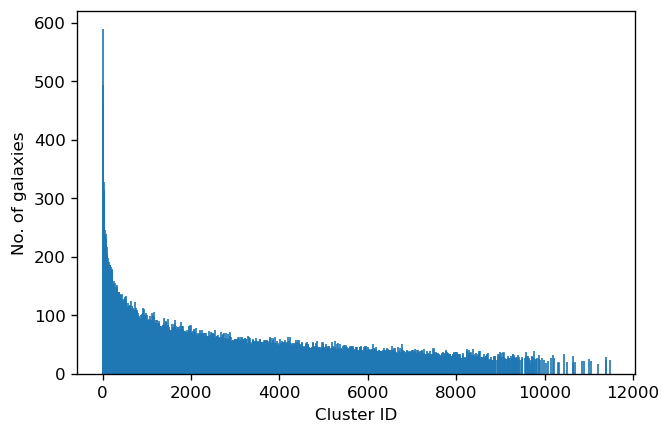

In [59]:
dpi = 120
plt.figure(dpi = dpi)

ser_gal_count = df_gal_around_6k_clus.groupby('host').size()
plt.bar(ser_gal_count.index, height = ser_gal_count,ec = 'C0');

# plt.yscale('log')
plt.xlabel('Cluster ID')
plt.ylabel('No. of galaxies');